
# Imports
---



In [ ]:
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# For warnings control
import warnings
warnings.filterwarnings('ignore')

## Define Constants

In [ ]:
BASE_DIR = "skin_cancer_dataset"  # Base directory for organized dataset
METADATA_PATH = "HAM10000_metadata.csv"  # Path to metadata CSV
IMAGES_PATH = "HAM10000_images"  # Directory containing the original images

## Load Data

In [ ]:
# Read the metadata CSV file
df = pd.read_csv(METADATA_PATH)
print("Dataset Overview:")
print("-" * 50)
print(df.info())
print("\nFirst few rows of the dataset:")
display(df.head())

Dataset Overview:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None

First few rows of the dataset:


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


## Class Distribution

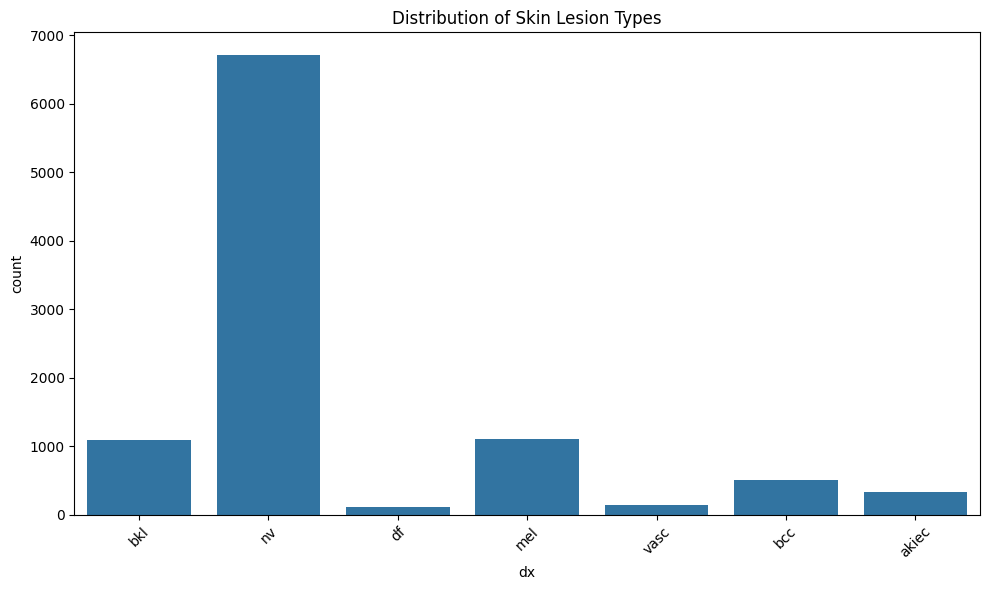


Class Distribution:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [ ]:
"""
Visualize the distribution of different skin lesion types
"""
# Create a bar plot of class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dx')
plt.title('Distribution of Skin Lesion Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print class distribution
print("\nClass Distribution:")
print(df['dx'].value_counts())

## Directory Structure

In [ ]:
"""
Create the necessary directories for organizing the dataset into train/val/test splits
"""
# Create base directory if it doesn't exist
os.makedirs(BASE_DIR, exist_ok=True)

# Create splits and class directories
splits = ['train', 'val', 'test']
classes = df['dx'].unique()

for split in splits:
    for class_name in classes:
        os.makedirs(os.path.join(BASE_DIR, split, class_name), exist_ok=True)

print("Directory structure created successfully!")

Directory structure created successfully!


## Split Dataset

In [ ]:
"""
Split the dataset into training, validation, and test sets while maintaining class distribution
"""
# Create stratified train/temp split (70%, 30%)
df_train, df_temp = train_test_split(df, test_size=0.3, stratify=df['dx'], random_state=42)

# Split temp into validation and test sets (15%/15% total)
df_val, df_test = train_test_split(df_temp, test_size=0.5, stratify=df_temp['dx'], random_state=42)

# Print split sizes
print("Dataset Split Sizes:")
print(f"Training set: {len(df_train)} images ({len(df_train)/len(df)*100:.1f}%)")
print(f"Validation set: {len(df_val)} images ({len(df_val)/len(df)*100:.1f}%)")
print(f"Test set: {len(df_test)} images ({len(df_test)/len(df)*100:.1f}%)")

Dataset Split Sizes:
Training set: 7010 images (70.0%)
Validation set: 1502 images (15.0%)
Test set: 1503 images (15.0%)


## Copy images to their directories

In [ ]:
print("Current directory contents:")
print(os.listdir())

Current directory contents:
['.config', 'HAM10000_metadata.csv', 'skin_cancer_dataset', 'sample_data']


In [35]:
# Define paths
IMAGES_PATH = "HAM10000_images"  # Directory containing the original images
BASE_DIR = "skin_cancer_dataset"  # Base directory for organized dataset

def copy_images(df_split, split_name):
    """Copy images to appropriate directories based on their split and class"""
    for idx, row in df_split.iterrows():
        src_path = os.path.join(IMAGES_PATH, f"{row['image_id']}.jpg")
        dst_path = os.path.join(BASE_DIR, split_name, row['dx'], f"{row['image_id']}.jpg")

        if os.path.exists(src_path):
            shutil.copy2(src_path, dst_path)
        else:
            print(f"Warning: Image {row['image_id']} not found")

print("Copying images...")
copy_images(df_train, 'train')
copy_images(df_val, 'val')
copy_images(df_test, 'test')
print("Images copied successfully!")

Streaming output truncated to the last 5000 lines.
Images copied successfully!


## Verify Dataset Structure

In [36]:
"""
Analyze the prepared dataset structure and verify class distribution in each split
"""
def analyze_split(split_name):
    """
    Analyze the distribution of images in a specific split

    Parameters:
    split_name: String, name of the split to analyze
    """
    split_path = os.path.join(BASE_DIR, split_name)
    class_counts = {}

    # Count images in each class
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            class_counts[class_name] = count

    return pd.Series(class_counts)

# Analyze each split
splits = ['train', 'val', 'test']
split_distributions = {}

for split in splits:
    split_distributions[split] = analyze_split(split)

# Create a DataFrame with all split distributions
distribution_df = pd.DataFrame(split_distributions)

# Display the distribution
print("Final Distribution of Images:")
display(distribution_df)

Final Distribution of Images:


,train,val,test
bkl,26,7,4
vasc,3,1,0
mel,12,4,3
bcc,16,5,4
nv,132,32,26
akiec,10,2,1
df,3,0,1


## Visualize Final Distribution

<Figure size 1200x600 with 0 Axes>

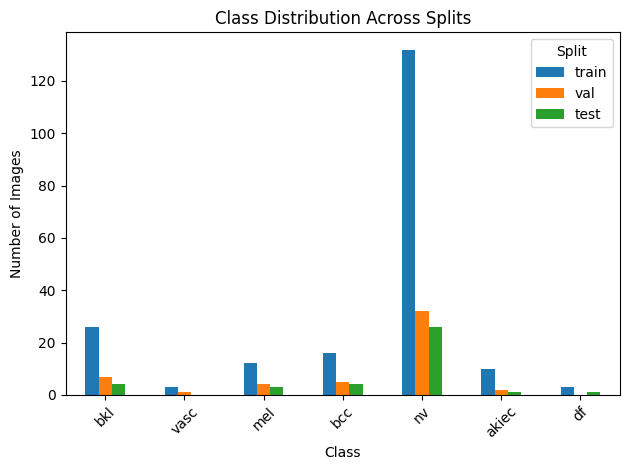

In [37]:
"""
Create a visualization of the class distribution across splits
"""
# Plot distribution across splits
plt.figure(figsize=(12, 6))
distribution_df.plot(kind='bar')
plt.title('Class Distribution Across Splits')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.legend(title='Split')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Save Split Information

In [38]:
"""
Save the split information for future reference
"""
# Save split DataFrames to CSV
df_train.to_csv(os.path.join(BASE_DIR, 'train_metadata.csv'), index=False)
df_val.to_csv(os.path.join(BASE_DIR, 'val_metadata.csv'), index=False)
df_test.to_csv(os.path.join(BASE_DIR, 'test_metadata.csv'), index=False)

## Dataset Summary

In [39]:
"""
Print a comprehensive summary of the prepared dataset
"""
print("Dataset Preparation Summary")
print("-" * 50)
print(f"Total number of images: {len(df)}")
print(f"Number of classes: {len(classes)}")
print("\nClass names and their meanings:")
class_meanings = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
for code, meaning in class_meanings.items():
    print(f"{code}: {meaning}")

print("\nDataset is now ready for model training!")

Dataset Preparation Summary
--------------------------------------------------
Total number of images: 10015
Number of classes: 7

Class names and their meanings:
nv: Melanocytic nevi
mel: Melanoma
bkl: Benign keratosis
bcc: Basal cell carcinoma
akiec: Actinic keratoses
vasc: Vascular lesions
df: Dermatofibroma

Dataset is now ready for model training!


## Model Training

Found 202 images belonging to 7 classes.
Found 51 images belonging to 7 classes.
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 104s 13s/step - accuracy: 0.4481 - loss: 2.1508 - val_accuracy: 0.6275 - val_loss: 1.4111
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 85s 11s/step - accuracy: 0.5374 - loss: 1.5119 - val_accuracy: 0.6275 - val_loss: 1.3631
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 132s 10s/step - accuracy: 0.5806 - loss: 1.5690 - val_accuracy: 0.6275 - val_loss: 1.2508
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 72s 10s/step - accuracy: 0.6624 - loss: 1.2925 - val_accuracy: 0.6275 - val_loss: 1.2679
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 81s 11s/step - accuracy: 0.6072 - loss: 1.3487 - val_accuracy: 0.6275 - val_loss: 1.2281
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 75s 10s/step - accuracy: 0.6449 - loss: 1.3035 - val_accuracy: 0.6275 - val_loss: 1.2124
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 86s 12s/step - accuracy: 0.6361 - loss: 1.2349 - val_accuracy: 0.6275 - val_loss: 1.2286
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 87s 12

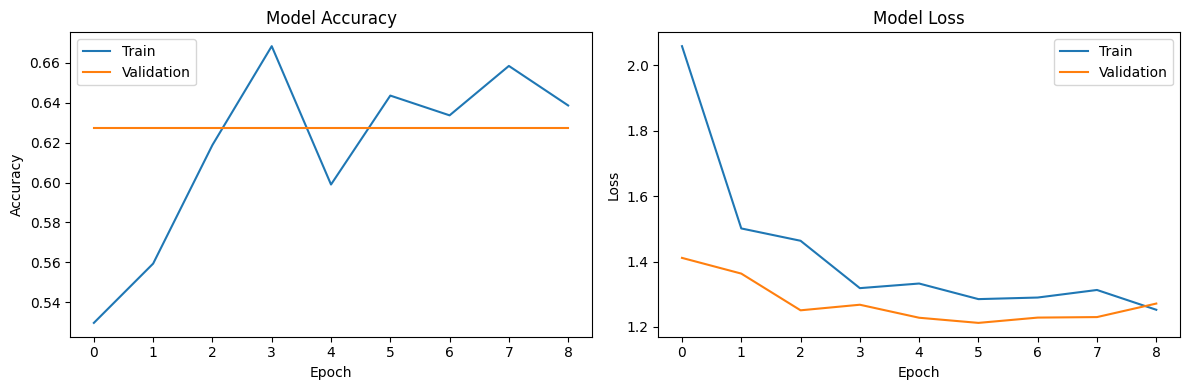

In [42]:
import tensorflow as tf
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

PIL.ImageFile.LOAD_TRUNCATED_IMAGES = True

# Parameters
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20

# Data generators
train_datagen = ImageDataGenerator(
   rescale=1./255,
   rotation_range=20,
   width_shift_range=0.2,
   height_shift_range=0.2,
   shear_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
   f'{BASE_DIR}/train',
   target_size=(IMG_SIZE, IMG_SIZE),
   batch_size=BATCH_SIZE,
   class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
   f'{BASE_DIR}/val',
   target_size=(IMG_SIZE, IMG_SIZE),
   batch_size=BATCH_SIZE,
   class_mode='categorical'
)

# Create model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
for layer in base_model.layers:
   layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
   train_generator,
   validation_data=validation_generator,
   epochs=EPOCHS,
   callbacks=[
       tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True),
       tf.keras.callbacks.EarlyStopping(patience=3)
   ]
)

# Save model
model.save('skin_cancer_model.keras')

# Visualize results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

## Visualize Training Results

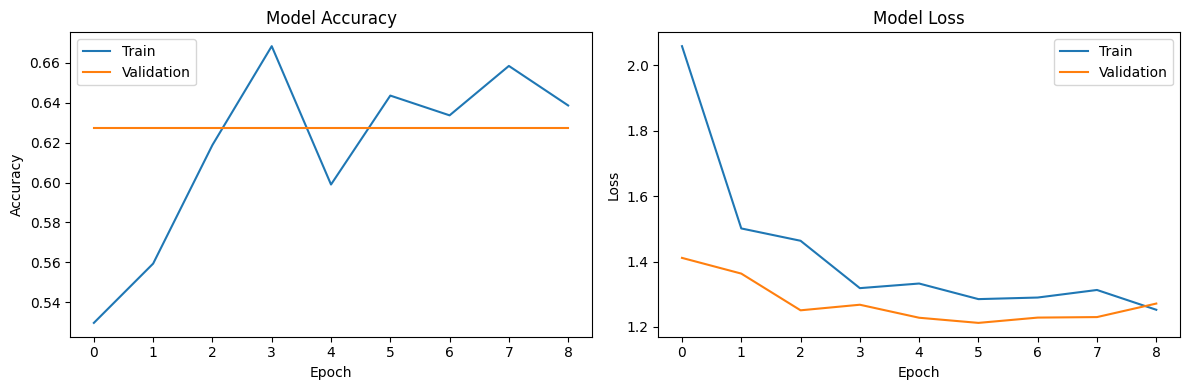

In [43]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()